## California Census Data

Build a model of housing prices in the state of California.

*This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).*

Statlib is closed now. But you can get the raw data from [Harry Wang](https://www.kaggle.com/datasets/harrywang/housing) on [Kaggle](https://www.kaggle.com/)

________________________________________________________________________________________________

The picture represents the main path to develop a Machine Learning Project

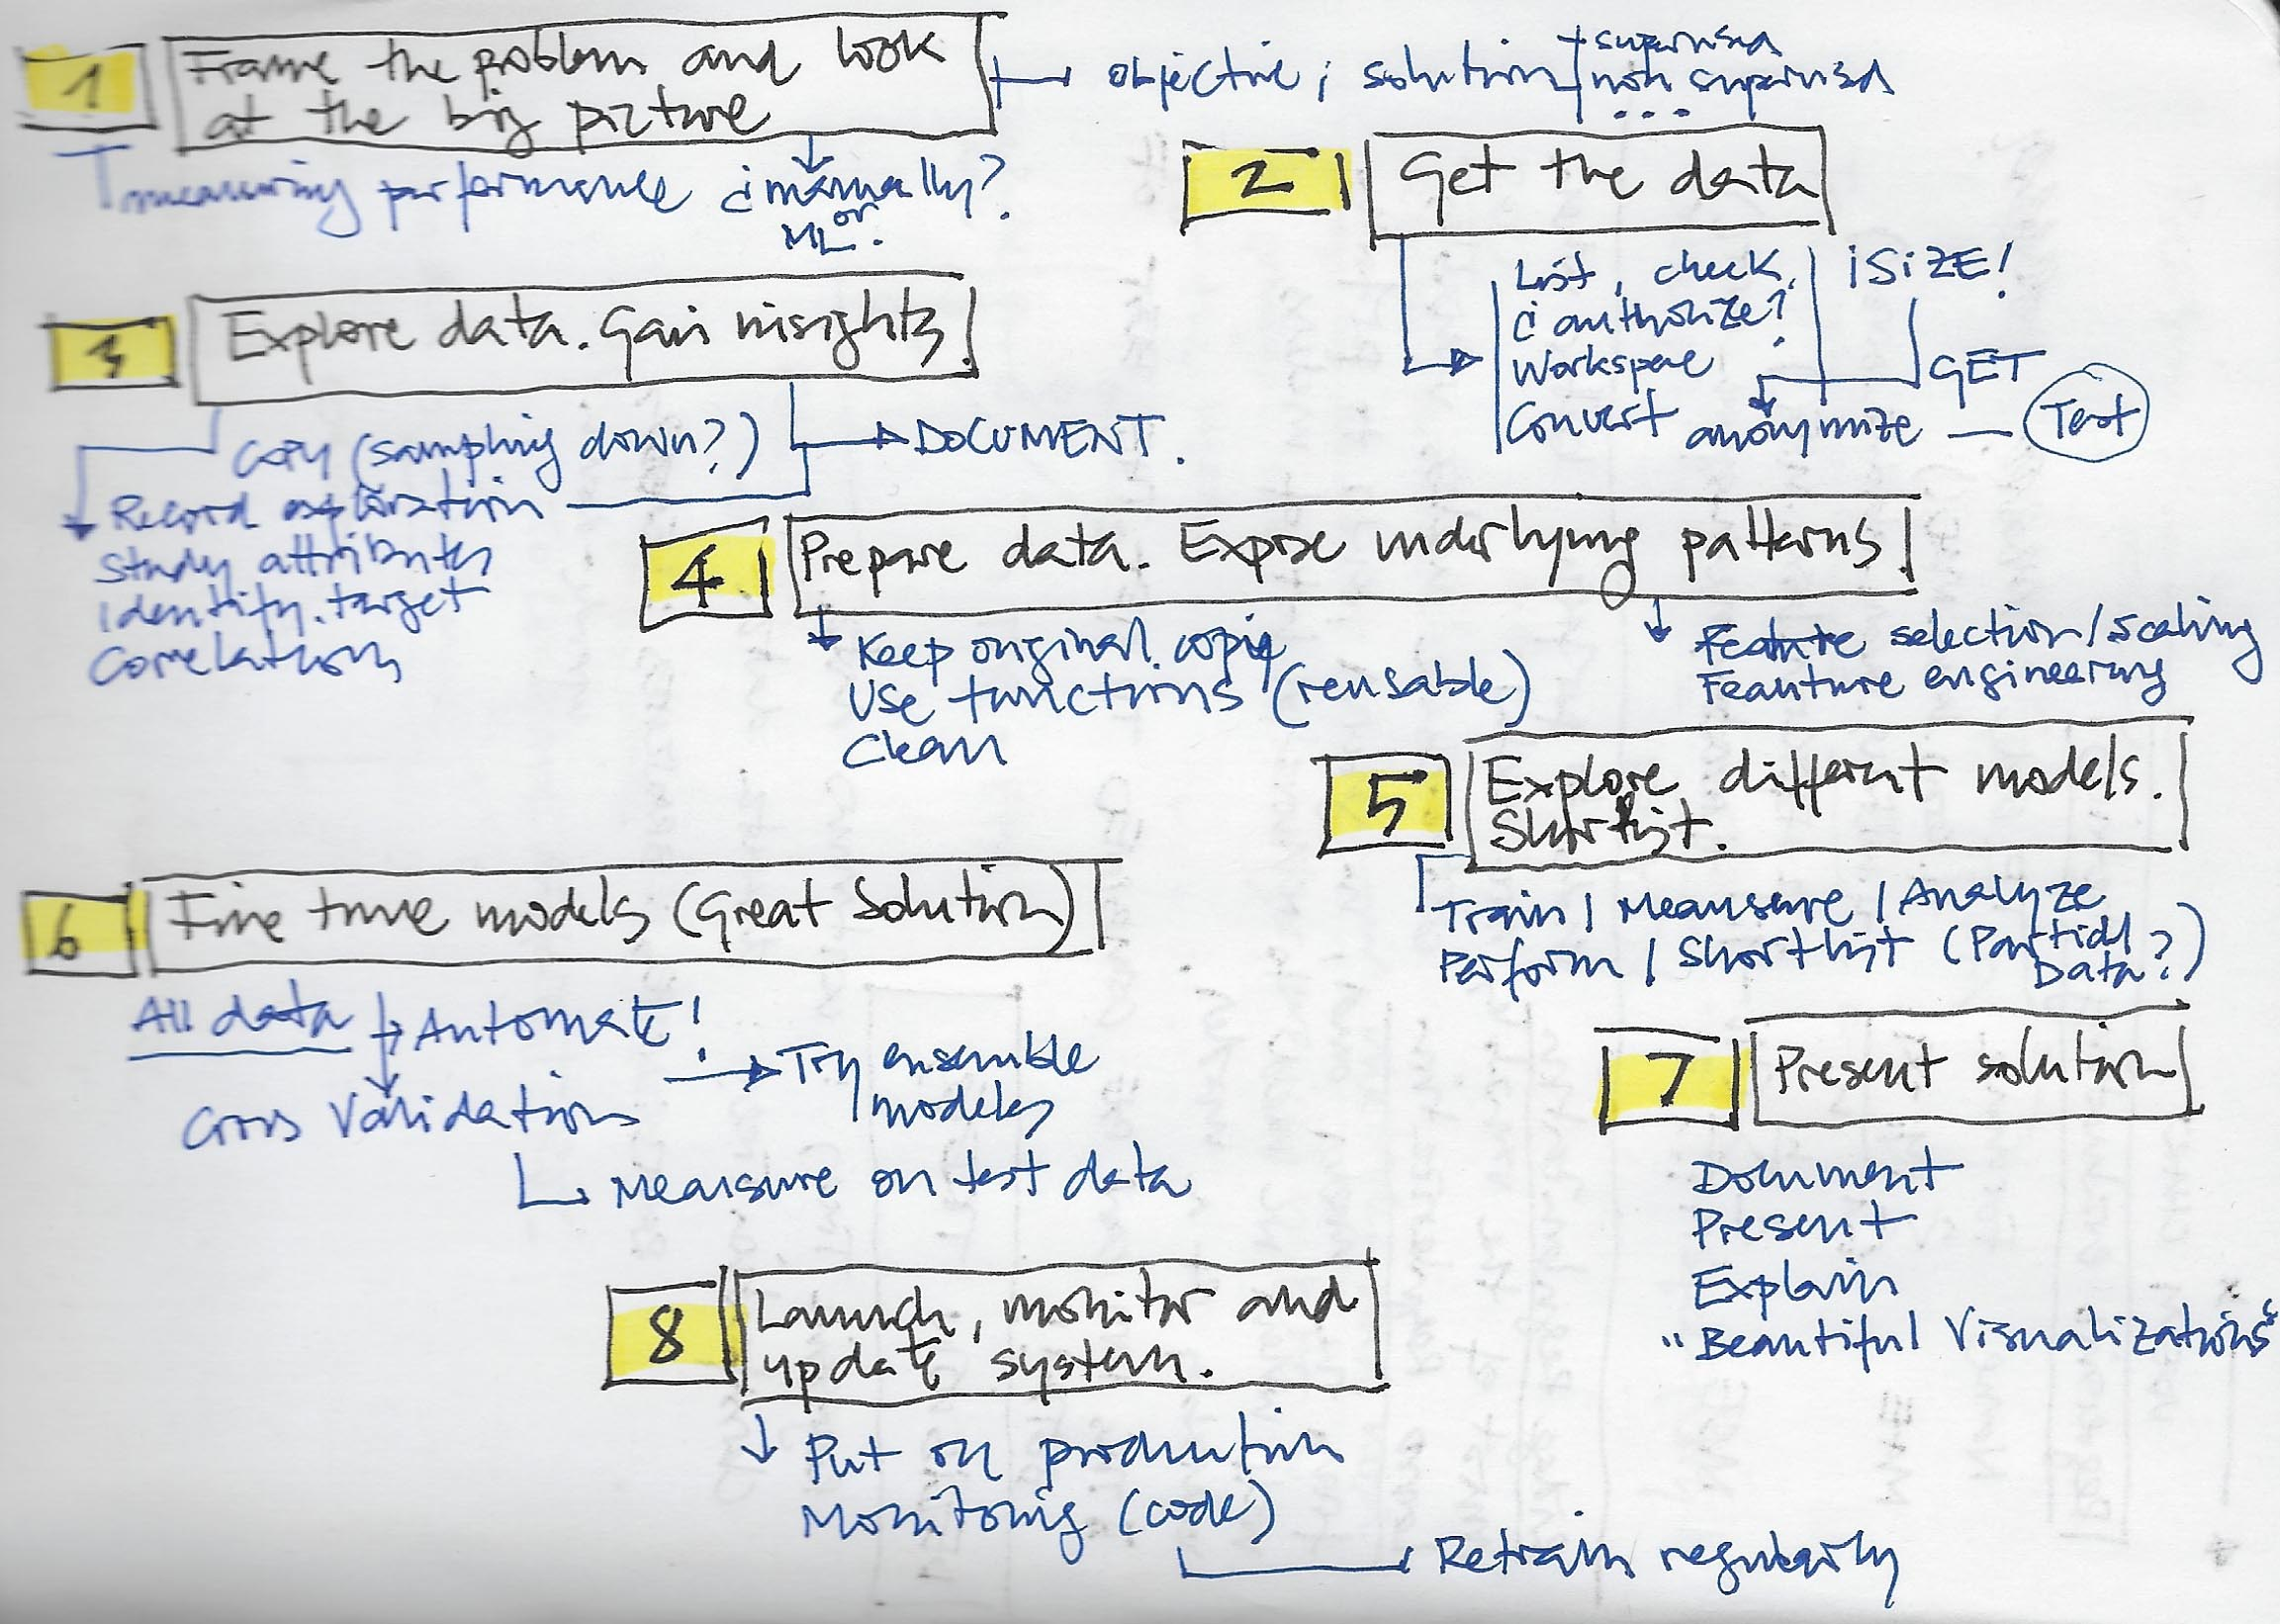

### First Decisions

At the start we need to ask ourselves about the project we are starting:

#### s___01

In this case, it is a problem of a **Supervised Learning** cause we have the labels to train with

It is also a **Regression** task as we need to predict a value. Being more specific, a **multiple regression** one; we have multiple features to make a prediction.

A **univariate regression** problem; we are only trying to predict one value for each district in the dataset.

No data in a continuos flow (staatic data) and the size of the database is small enough to not having memory issues (this means we can train and work with the whole dataset)

#### s___02

Select **Performance Measure**

In regression problems there are two most used meaures. RMSE and MSE (Root Mean Square Error and Mean Square Error).

In this case, as apparently, there are no many outliers, we are going to use RMSE. This is the formula:

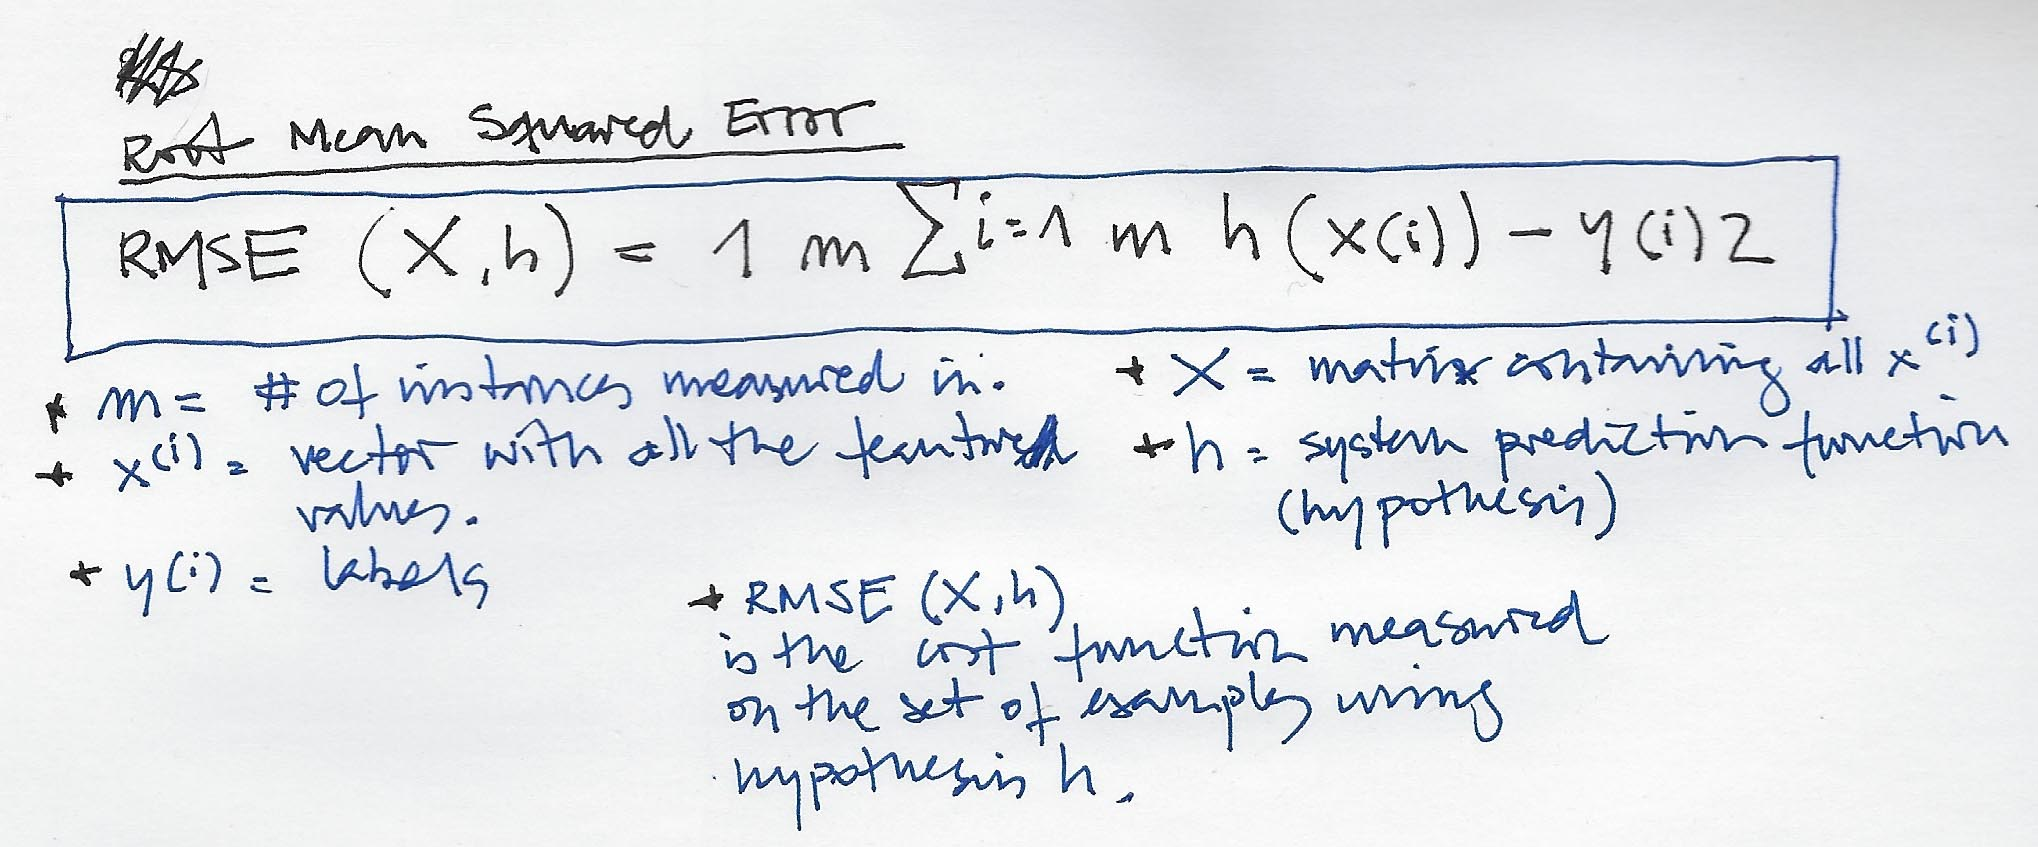

### Get Data

In [1]:
# import and load all the libraries needed
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Create a function to get .tgz dataset convert it into a csv file
# and load it as a pandas dataset called housing

def load_housing_data():
  tarball_path = Path('datasets/housing.tgz')
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True, exist_ok=True)
    url='https://github.com/ageron/data/raw/main/housing.tgz'
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path='datasets')
  return pd.read_csv(Path('datasets/housing/housing.csv'))


housing = load_housing_data()

In [4]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


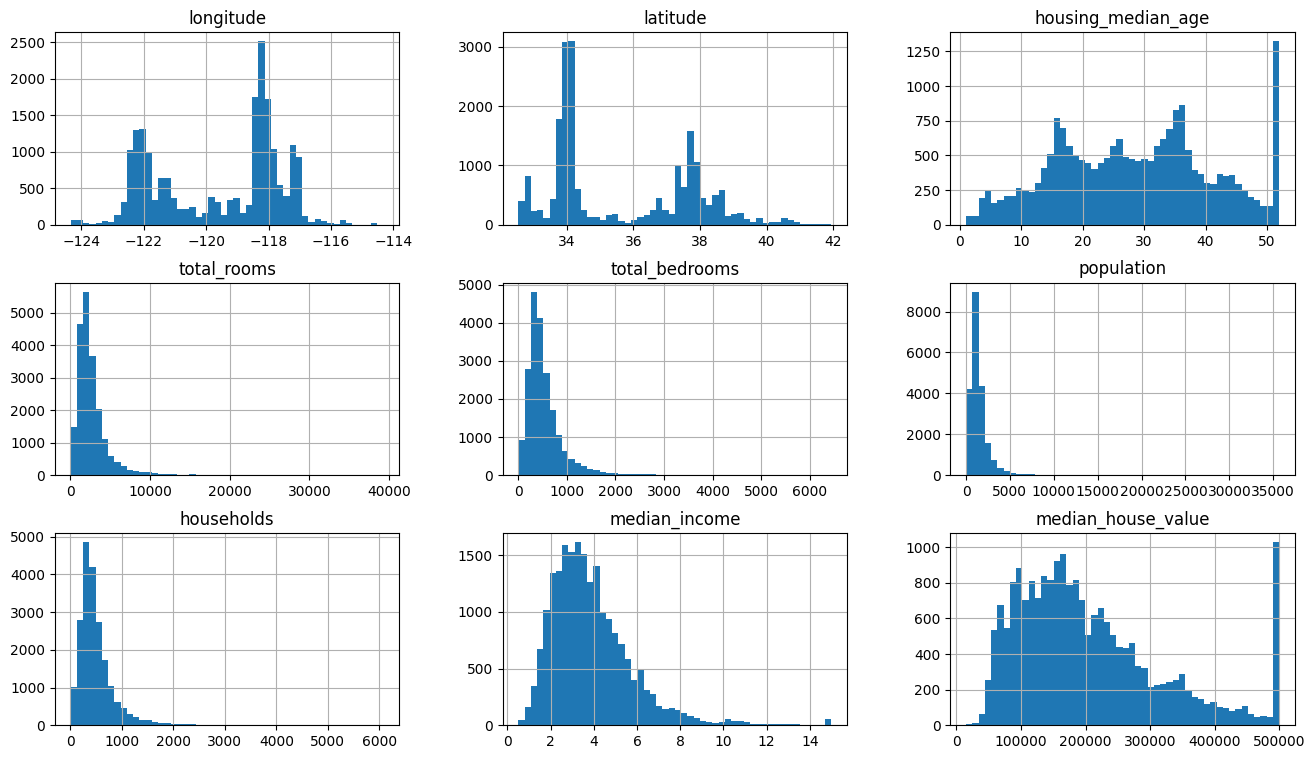

In [8]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(16,9))
plt.show()

Fisrt analysis from this histograms:

* `housing_median_age`and `median_house_value`are capped. With the value we have a problem because is our **target**. we can't use it without making changes. We need to get rid of the values beyond 500000 to a correct model's train

* We need to try to transform this attributes to get a more symmetrical and bell-shaped distributions. It make eaiser for machine learnig algorithms to detect patterns. (Basic objective)

#### 👁️👁️ Note:

Before continue with some more data operation is much better to split the data and creta a **Test Set**

### Create Test Set

In [9]:
import numpy as np

def shuffle_and_split(data, test_ratio):
  np.random_set_seed(42)
  shuffle_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffle_indices[:test_set_size]
  train_indices = shuffle_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]



Above we have a raw function that create set and train split dataset.

`np.random.set_seed()` makes the randomness consistenly when we pass through data several times

There are other ways to do this, Scikit-Learn has `train_test_split`

In [10]:
from sklearn.model_selection import train_test_split

train_Set, test_Set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
len(train_Set), len(test_Set)

(16512, 4128)

Until now we are splitting data randomly. This is ok if the dataset is large enough. If it is not the we are introducing (at least running the risk) significant sample bias.

#### Reducing possible samplig biases

If, in the preparation of the project we now that some value is very important (higly correlated), we'll want to ensure that the test and train datasets are representative of this values categories.

When this value is numeric we can apply some code to create some categories.

*📕 "It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum's importance may be biased. This means that you should not  have too many strata, and each stratum should be large enough."*

In [12]:
# make five categories of `median_income`
housing["income_cat"]=pd.cut(housing['median_income'],
                      bins=[0,1.5,3.0,4.5,6,np.inf],
                      labels=[1,2,3,4,5])


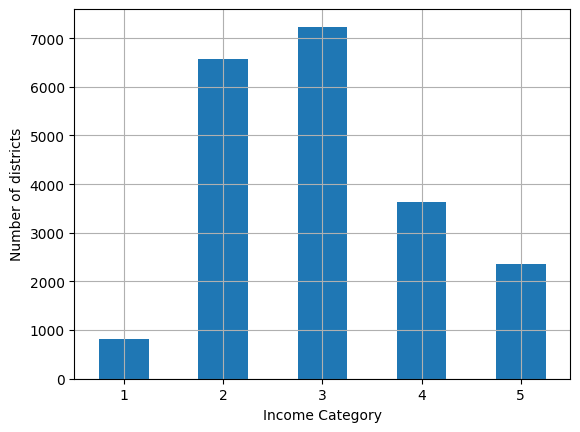

In [13]:
# Visualize this new categories in a bar chart
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of districts')
plt.show()

Having multiple splits could be useful if you better estimate your model performance.

This code generates 10 different stratified splits of the same dataset:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])


In [15]:
# Now we can select which of the splits use for the model
# In this case we are selecting the first one

strat_train_set, strat_test_set = strat_splits[0]

Widely use of this kind of strip make is the reason that we can use `train_test_split()` from ScikitLearn

In [16]:
stat_train_set, strat_test_set  = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing['income_cat'],
    random_state=42
)

In [17]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Since we've used 'incoming_cat' for splitting, we don't need it anymore.
WE can revert data

In [18]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

<ipython-input-18-3d3814eeeb24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop('income_cat', axis=1, inplace=True)


In [19]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY


### Explore and Visualize Data / Gain insights

* Put test data aside, only explore training data
* If training set is very large sample a exploration set
* Make a copy of the original so we can revert to it later

In [20]:
housing = strat_train_set.copy()

#### Visualize geographycal data

<function matplotlib.pyplot.show(close=None, block=None)>

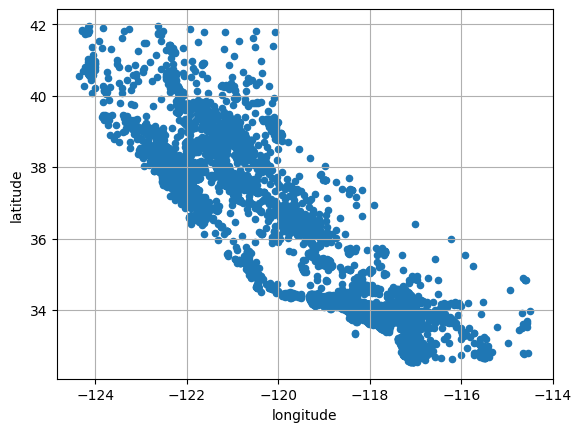

In [21]:
# Scatter plot with latitude and longitude as axis
housing.plot(kind="scatter",x='longitude',y='latitude',grid=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

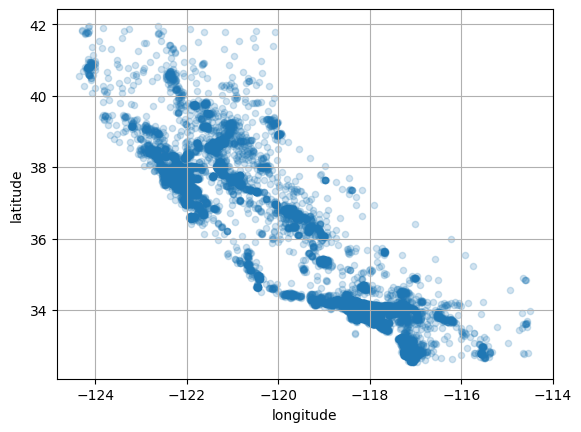

In [22]:
# Add some transparency to better view of places with higher density of data
housing.plot(kind="scatter",x='longitude',y='latitude',grid=True, alpha=0.2)
plt.show

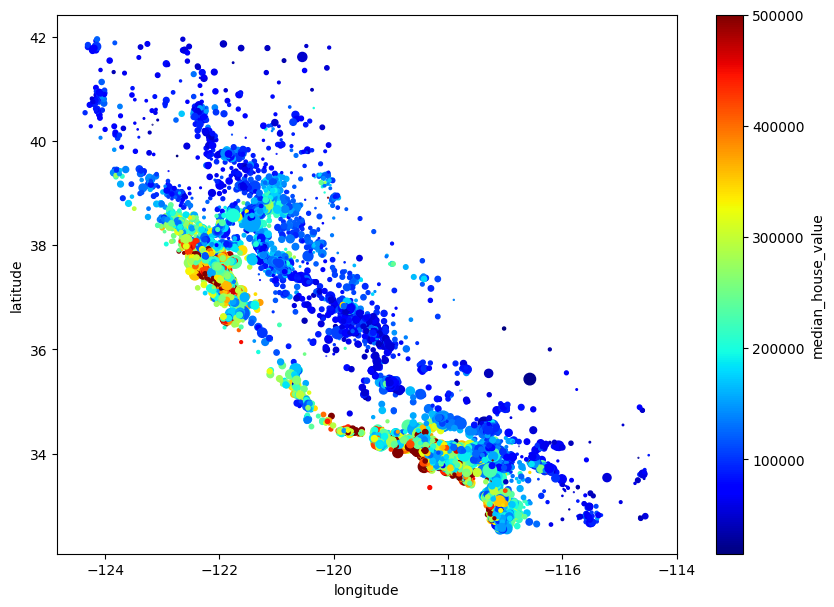

In [23]:
# Let´s improve the map:
# Radius represent population
# Color represents price
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             s=housing['population']/100,
             c='median_house_value',
             cmap='jet',
             legend=True,
             sharex=False,
             figsize=(10,7))

plt.show()

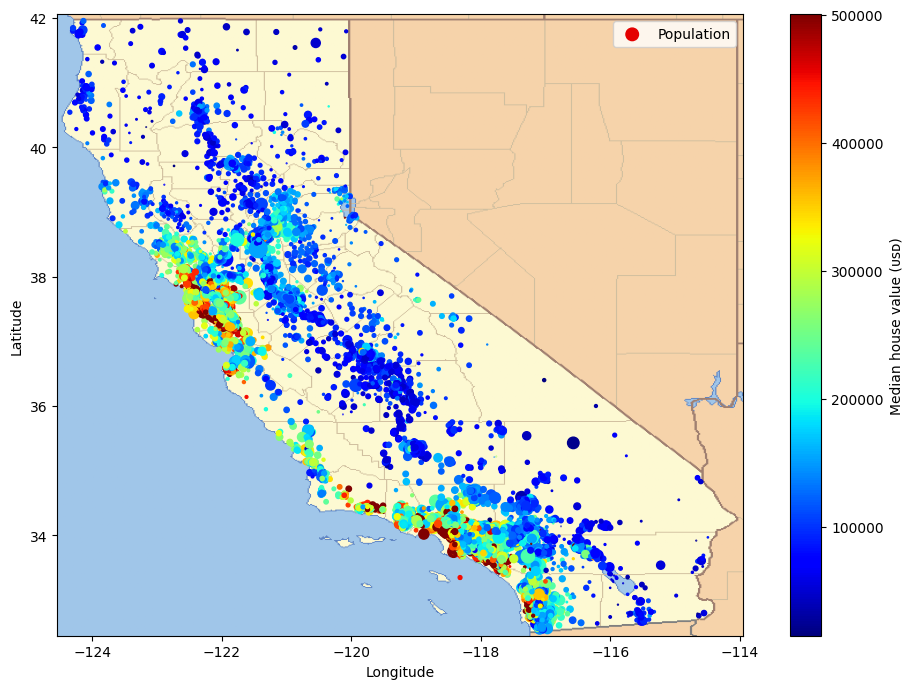

In [24]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

#### Look for correlations

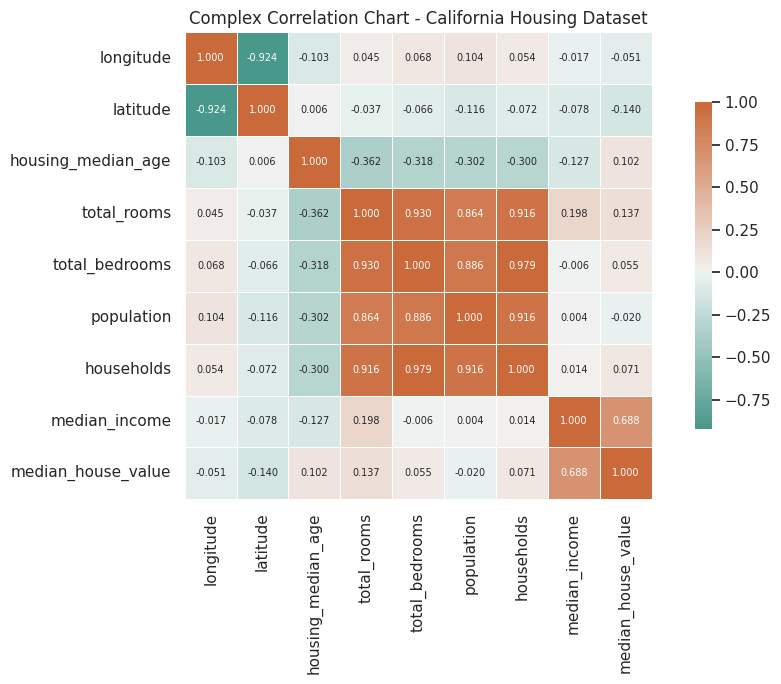

In [25]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = housing.corr(numeric_only=True)

# Create a complex correlation chart using a heatmap
plt.figure(figsize=(10, 7))
sns.set(style="white")  # Set the style of the plot

# Generate a custom diverging colormap
cmap = sns.diverging_palette(173, 27, s=80, l=55, n=9, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7},
            annot=True, fmt=".3f", annot_kws={"size": 7, "va": "center", "ha": "center"})

# Add title and show the plot
plt.title("Complex Correlation Chart - California Housing Dataset")

# Configure matplotlib to export PDF with editable fonts
plt.rcParams['pdf.fonttype'] = 42

# Save the plot as a PDF vector format
plt.savefig("correlation_Housing_Chart.pdf", format="pdf")
# Save Figure
save_fig("correlation_Housing_Chart")
# Show the plot
plt.show()

In [26]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

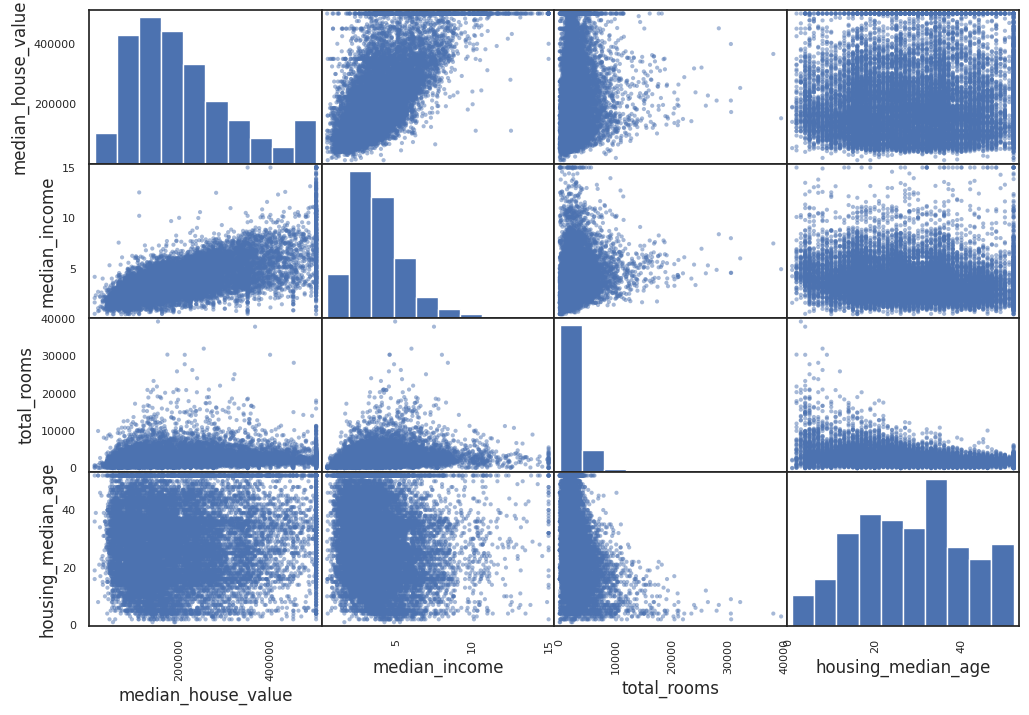

In [27]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

From the scatter plots and the correlation matrix we can see that 'median_income' is the most correlated field. 👇

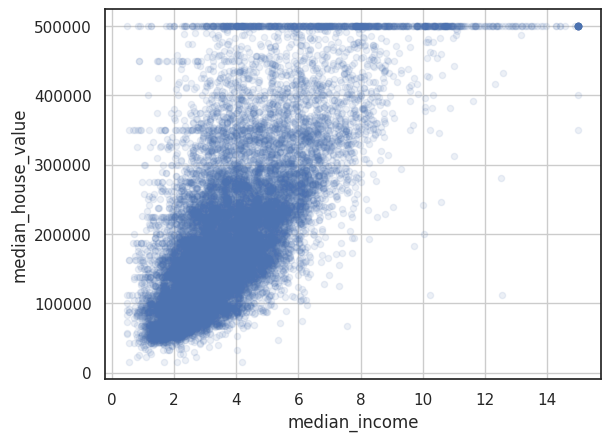

In [28]:
housing.plot(kind='scatter',x='median_income',y='median_house_value', alpha=0.1, grid=True)
plt.show()

Besides the high marked line, in this plot, in the capped values in 500000. We can see other less obvious horizontal lines in $450,000 and in $350,000 and also in something ner $280,000.

We need to remove the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

#### Explore with Attribute Combinations

Let's recap:
* Found data quirks to clean up before feeding the data
* Found interesanting correlations between some fields
* Some attributes are skewed-right distribution (Transform them by the square root or their logarithm).

Now we may want to try out various attributes combinations.

* We may want to know the number of rooms per household.
* Compare the number of bedrooms with the number of rooms
* The population per household should be of interest too


In [29]:
# Create new attributes
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house'] = housing['population']/housing['households']

In [30]:
correlation_matrix = housing.corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-30-14ed21a0944b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

We have created three new attributes:

* **rooms_per_house** tell us that more rooms higher the value
* **people_per_house** is not every correlated
* **bedrooms_ratio**, when the ratio decreases the value increases
<br>
<br>

*📑 "This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably prototype. but this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step."*

### Prepare the data for Machine Learning Algorithms

👁️ NOTE: Is better to write functions for this purpose. And then you can call them from colab or any other notebook. [Read this](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7)

In [31]:
# Revert to a clean training set (copying strat_train_set once again)
# Create separate features and labels datasets
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

#### Clean the data

We've observed that there are some missing values in total_bedrooms.

Usually we'll work with data that will have missing values. And most Machine Learning Algorithms cannot work with missing features.

In pandas we can correct this in three ways:

* Get rid of the corresponding rows with missing or na values <br>
`housing.dropna(subset=['total_bedrooms], inplace=True)`
* Get rid of the whole attribute <br> `housing.drop('total_bedrooms, axis=1)`
* Set the missing values to some value(zero, mean, median, etc.) <br> `median= housing['total_bedrooms'].median()`<br>`housing['total_bedroom'].fillna(median, inplace=True)`

This third option is the less destructive of all. When the dataset is not large enough is better to use this one.

In *ScikitLearn* we can use this class: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# the median can only be computed on numerical values
housing_num = housing.select_dtypes(include=[np.number])

# impute the values with the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
# As a way to be sure we correct all missing values,
# We impute the median to all the numerical features
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [35]:
imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [36]:
# Now we can use the imputer to transform the training data
X = imputer.transform(housing_num)

👁️ There are other powerfull imputers in the [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) module.

In [37]:
# X is a numpy array. We need to wrap it in a DataFrame and recover column names and index from housing_num
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


#### Handling Text and Categorical Attributes

Data use to have, also, text attributes. When there are limited number of values each of them represent a category.

In this case we only have one attribute `ocean_proximity`

Let's handle it

In [38]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Most Machine Learniing Algorithms prefer to work by number, instead strings.

Let's convert categories into numbers.

We are using [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) from sklearn.preprocessing

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [40]:
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [41]:
# Get  the list of categories using the categories_ instance
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue of this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.

A way to fix this is to assign 0/1 values for each category: **One Hot Encoder**

In ScikitLearn we can use class [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

By default, the output of a OneHotEncoder is a SciPy *sparse matrix*, instead of a Numpy array

In [43]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

*Sparse array is a matrix in which most of the elements are zero. There is no strict definition regarding the proportion of zero-value elements for a matrix to qualify as sparse but a common criterion is that the number of non-zero elements is roughly equal to the number of rows or columns. By contrast, if most of the elements are non-zero, the matrix is considered dense. The number of zero-valued elements divided by the total number of elements (e.g., m × n for an m × n matrix) is sometimes referred to as the sparsity of the matrix.*

In [44]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### Pandas has this function called `get_dummies()`

🧮 <br>
`df_test = pd.DataFrame({'ocean_priximity':['INLAND','NEAR BAY]})`
<br>    `pd.getDummies(df_test)`

The main differences with `sklearn.preprocessing.OneHotEncoder`:
* OneHotEncoder remembers which categories it was trained on
* Will detect an unknown category and rais an exception (or assing zero to unknown category)


In [46]:
df_test = pd.DataFrame({'ocean_proximity':['<2h OCEAN','ISLAND']})
pd.get_dummies(df_test)

,ocean_proximity_<2h OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [47]:
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [48]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [49]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

#### Feature Scaling and Transformation

Almost all ML algorithms don`t perform well if the range of the numerical features are quite different between them.

That is why we can do two operations to get all attributes to have the same scale:
* **min-max scaling** [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) <br> For each feature the value is shifted and rescaled so that they en uo ranging from 0 to 1 (Neural Networks work best with zero-mean inputs, so range of -1, 1 is preferable)
* **standardization** [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)<br> Substracts the mean value (so standardized values have a zero mean), then it divides the result by the standar deviation (so standardized values have a standard deviation of 1) <br>*is much less affected by outliers*

In [50]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [51]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_min_std_scaled = std_scaler.fit_transform(housing_num)

Before applying any of this operations we need to transform *heavy tailed distribution* features to make it closer to a Gaussian distribution.

We can use the square root, or raise the feature to a power between 0 and 1, or log.

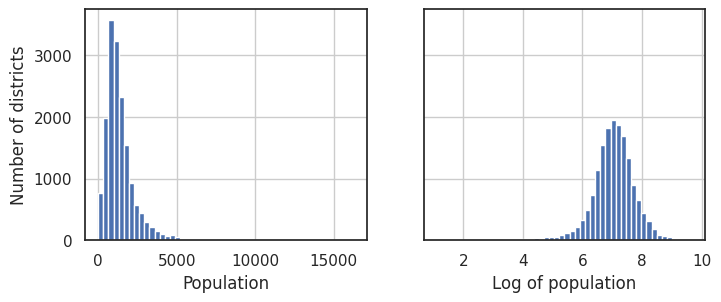

In [52]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

Another aproach to handle **heavy-tailed** features consists in *bucketizing* the feature. Chopping its distribution into roughly equal-sized buckets, and replacing each feature value with the index of the bucket it belongs to.<br>
Also features with a **multimodal distribution** can use this bucketizing operation.<br>
For this last ones there is other way: to add a feature for each of the modes, representing the similarity between the feature value and a particular mode. The similarity measure is typically computed using a *radial basis function(RBF)*.<br>
The most commonly used RBF is the Gaussian RBF, whose output value decays exponentially as the input value moves away from the fixed point.<br>
Using Scikit-Learn's [rbf_kernel()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html) function, you can create a new Gaussian RBF feature measuring the similarity between the housing median age and 35.

In [53]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[['housing_median_age']],[[35]],gamma=0.1)

👁️ **Most Scikit-Learn's transformers have an inverse_transform() method, making it easy to compute the inverse of their transformations.**

In [54]:
# Train model with single raw input 'median_income'
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

In [55]:
scaled_labels

array([[ 2.18511202],
       [ 2.40625396],
       [-0.90740625],
       ...,
       [-0.49894408],
       [ 2.54675281],
       [ 0.23385961]])

In [56]:
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5] # pretend this is new data

In [57]:
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [58]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

We can use a simpler option using [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html)

In [59]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

In [60]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

#### Custom Transformers

As we are going to need to make some operations with our data, we can write functions using [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) a Scikit_Learn class with the posibility to add the reverse function if we need to recover original data.

In [61]:
# Let's create a log-transformer and apply it to the population feature
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp) # inverse_func is optional
log_po = log_transformer.transform(housing[['population']])

Transformation function can take hyperparameters as additional arguments.

In [62]:
# Create a transformer that computes the same Gaussian RBF measure

rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])

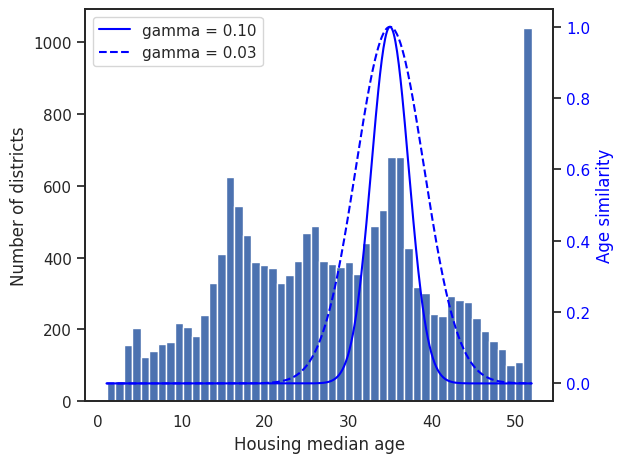

In [63]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [64]:
# Add a feature that will measure the geographic similarity between each district and San Francisco
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[['latitude','longitude']])

If you want your transformer to be trainable, learning some parameters in the fit() method and using them later in the transform() method, you need to write a custom class with three methods:
* fit() (which must return self)
* transform()
* fit_transform()



In [65]:
# Here is a custom transformer that acts much like StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True): #no *args o *kwargs!
    self.with_mean=with_mean

  def fit(self, X, y=None):
    X = check_array(X)
    self.mean_ = X.means(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1] # ever estimator stores this in fit()
    return self # always return self!

  def transform(self, X):
    check_is_fitted(self) # looks for learned attribute (with trailing _)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X -self.mean_
    return X / self.scale_



By using the StandardScalerClone class, we ensure that the same scaling is applied to both the training and testing data, maintaining consistency in the preprocessing steps. This helps the machine learning model to perform better and make more accurate predictions.

##### 📑 NOTE:
* The [sklearn.util.validation](https://www.programcreek.com/python/index/9604/sklearn.utils.validation) contains several function we can use to validate the inputs.
* Scikit_lear pipelines require the fit() method to have two arguments X and y, which is why we need th y=Nonr argument even though we don't use y.
* All ScikitLearn estimators set n_features_in_ in the fit() method, and they ensure that the data passed to transform() or predict() has this number of features.
* The fit() method must return self
* the implementation is not 100% complete: all estimators should set feature_names_in_ in the fit() method when they are passed a DataFrame.

The following code demostrate custom transformers that u ses a KMeans clusterer in the fit() method to identify the main clusters in the training data, and the uses rbf_kernel in the transform() method to measure how similar each sample is to each cluster

In [66]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init='auto', random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [67]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(housing[['latitude','longitude']], sample_weight=housing_labels)

In [68]:
similarities[:3].round(2)

array([[0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.15],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.11, 0.  , 0.  , 0.64, 0.  ],
       [0.56, 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.27, 0.  , 0.62]])

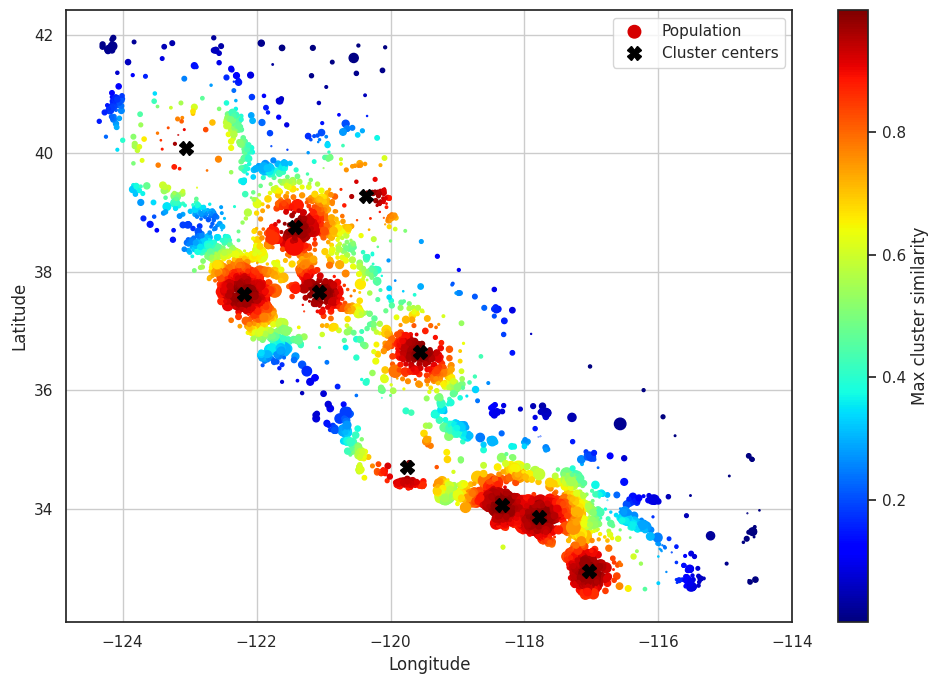

In [69]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=10,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

#### Transformation Pipelines

There are many transformations that need to be executed in the right order.

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class can help us with...

In [70]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [71]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

If you don't want to name the transformers, you can use make_pipeline() function instead; it takes transformers asw positional arguments and cretaes a Pipeline using the names of the transformers' classes, in lowercase and without underscores.

In [72]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

Let's call the pipeline's fit_transform method and look at the output's first two rows

In [73]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

as you saw earlier if you want to get a nice DataFrame you can use `get_feature_names_out()`method

In [74]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index = housing_num.index
    )

In [75]:
df_housing_num_prepared.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
1286,-0.868193,1.088610,1.861119,-0.370856,-0.561571,-0.668194,-0.472739,-0.276883
18078,0.606392,-0.838047,0.430885,-0.710868,-0.808122,-0.837181,-0.893265,1.185526
4396,-1.278077,0.830784,0.589800,0.982782,0.858470,0.560383,1.018690,0.811824
18031,0.566403,-0.622412,-0.522604,0.248303,0.673556,1.128543,0.642568,-0.593710
6753,0.721359,-0.739605,-0.919891,-0.423482,0.080885,0.150248,0.177639,-1.418129


In [76]:
df_housing_num_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Until now, we have handled the categorical columns and the numerical column separately.

**It's better to have a single transformer capable of handling all columns**

The following ColumnTransformer will apply num_pipeline to the categorical attribute:

In [77]:
from sklearn.compose import ColumnTransformer

num_attribs = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(
                             SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown='ignore')
                             )

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

With the next code, transformers are automatically named 'pipeline-1' and 'pipeline-2' instead 'num' and 'cat'

It is not necessary to give manully a name

In [78]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

Now we are ready to apply this ColumnTransformer to the housing data:

In [79]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [80]:
df_housing_prepared = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index = housing.index
    )
df_housing_prepared.head(10)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
1286,-0.868193,1.088610,1.861119,-0.370856,-0.561571,-0.668194,-0.472739,-0.276883,0.0,1.0,0.0,0.0,0.0
18078,0.606392,-0.838047,0.430885,-0.710868,-0.808122,-0.837181,-0.893265,1.185526,1.0,0.0,0.0,0.0,0.0
4396,-1.278077,0.830784,0.589800,0.982782,0.858470,0.560383,1.018690,0.811824,0.0,0.0,0.0,1.0,0.0
18031,0.566403,-0.622412,-0.522604,0.248303,0.673556,1.128543,0.642568,-0.593710,1.0,0.0,0.0,0.0,0.0
6753,0.721359,-0.739605,-0.919891,-0.423482,0.080885,0.150248,0.177639,-1.418129,1.0,0.0,0.0,0.0,0.0


### RECAP:

Let's put together all about transformation pipelines:

* As most ML algorithms can't deal with missing values, we replace them with the median value. In categorical features, it will be replaced with the most frequent value (this is relative and only works very well when database is big enough)

* Also, we need to one-hot-encode categorical features.

* A few ratio features will be added. We always try to add operational features that improve correaltion with label/s

* Cluster similarity features will be more usefull than longitude and latitude

* Features with a long tail will be replaced by their logarithm. Always better process data with Gaussian or uniform distributions

* Standardize all numerical data. Give the same scale to all the features

This is the code that do all of the above:

In [81]:
def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
  return['ratio'] # features name out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy='median'),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('bedrooms', ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('rooms_per_house', ratio_pipeline(),['total_rooms','households']),
    ('people_per_house', ratio_pipeline(),['population','households']),
    ('log', log_pipeline, ['total_bedrooms','total_rooms','population',
                           'households','median_income']),
    ('geo', cluster_simil, ['latitude','longitude']),
    ('cat',cat_pipeline, make_column_selector(dtype_include=object)),
  ],
    remainder=default_num_pipeline) # one column remaining: housing_median_age



In [82]:
# Run ColumnTransformer
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [83]:
df_housing_prepared = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index = housing.index
    )
df_housing_prepared.head(10)

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,9.294038e-01,1.046684e-14,...,1.178038e-03,1.380369e-01,4.823218e-18,1.428759e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,2.031119e-12,9.516321e-01,...,9.032653e-27,2.708910e-09,3.543029e-01,1.920613e-14,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,5.965306e-01,3.641883e-15,...,6.878132e-03,2.601786e-01,3.543168e-18,6.239035e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,1.414898e-18,2.820539e-01,...,8.880517e-35,3.532710e-14,8.738956e-01,3.243719e-20,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,2.143295e-14,9.454270e-01,...,9.015615e-30,4.730589e-11,5.137138e-01,1.189031e-16,0.0,0.0,0.0,0.0,1.0,0.589800
1286,-0.743942,0.113646,-0.184066,-0.475568,-0.159448,-0.655784,-0.295737,-0.078518,4.294868e-01,1.017404e-11,...,1.868529e-04,8.634902e-01,3.015990e-14,4.569520e-01,0.0,1.0,0.0,0.0,0.0,1.861119
18078,-0.489249,0.556477,0.050602,-1.058155,-0.856230,-1.076379,-1.255299,1.203677,2.068799e-13,9.551094e-01,...,1.911179e-28,2.816895e-10,3.656887e-01,1.027640e-15,1.0,0.0,0.0,0.0,0.0,0.430885
4396,-0.389217,-0.024225,-0.158161,1.029712,1.126642,0.806339,1.105551,0.942136,9.318909e-01,1.843912e-12,...,9.059615e-05,2.630137e-01,1.370601e-15,8.731967e-02,0.0,0.0,0.0,1.0,0.0,0.589800
18031,0.675013,-0.456707,0.128117,0.905123,0.580740,1.167537,0.864504,-0.498515,1.030580e-11,8.603095e-01,...,1.251586e-25,1.213188e-08,2.906259e-01,1.327826e-13,1.0,0.0,0.0,0.0,0.0,-0.522604
6753,1.816054,-0.941470,-0.044126,0.406790,-0.246253,0.468905,0.492199,-2.283376,1.609885e-13,9.905276e-01,...,3.042276e-28,3.821077e-10,5.596180e-01,1.798714e-15,1.0,0.0,0.0,0.0,0.0,-0.919891


## Select and Train a Model

Let's begin with basic linear regression model

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a8...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a80f127d810>)])),
                ('linearregression', LinearRegression())])

In [87]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([248700., 372800., 130800.,  93600., 326300.])

In [88]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

Comparing prediction vs labels we can see that there ia a value off 200000, a lot. Others are in 25% and there is one below 10%

Let's measure the RSME for the whole training set (RSME is the performance measure choosen)

In [89]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68831.98440583334

Ok, we get almost 69K prediction error in prices between 120000 and 265000.
<br> 🔴 **Not very well**

Example of **model underfitting** the training data.
* Features would not provide enough information or,
* the model is not powerfull enough

First, let's try a more complex model: **DecissionTreeRegressor**

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a8...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a80f127d810>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [93]:
# Evaluate the new model
housing_predictions = tree_reg.predict(housing)
tree_rsme = mean_squared_error(housing_labels,housing_predictions,squared=False)
tree_rsme

0.0

A perfect model?????

We need to be sure, so we are going to use part of the set for training and part for validation

A good method is **Cross-Validation** and Scikit-Learn have a good feature: [k_-fold cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

In [96]:
from sklearn.model_selection import cross_val_score
# Scikit-Learn cross validation gives us a negative value we anticipate this adding -
tree_rmses = - cross_val_score(tree_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [97]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66354.333214
std       1961.249494
min      62111.629941
25%      65389.895312
50%      66883.212924
75%      67630.601638
max      68595.829637
dtype: float64

Now it looks even worse than with the linearRegression model.
And we learn on more thing.

There is an overfitting problem when the training error is low (actually 0.0) and the validation error is high

Let`s try one more model: **RandomForestRegressor**

In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = - cross_val_score(forest_reg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

In [100]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47072.660396
std       1243.256792
min      44920.057855
25%      46080.957607
50%      47425.806371
75%      47883.125185
max      48888.435266
dtype: float64

In [102]:
forest_reg.fit(housing,housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rsme = mean_squared_error(housing_labels,housing_predictions,squared=False)
forest_rsme

17468.316444785585

Still overtifitted. 47K to 17K there is a big difference!

Solutions:

For RandomForest
* Simplify the model
* constraint it (i.e., regularize it)
* get a lot more training data

Better: Try more different models of other ML categories

**The goal is to get a shorlist of (2-5) promising models**


## Fine-Tune your model

Assuming that we have that shortlist [???]